# Fashion MINST Classification with 2D CNN
The notebook build CNN 2D model to classify the images of Fashion MNIST into 10 classes

## *Question: How does the 2D CNN model perform on classifying the images of fashion ? Which category does this model make more mistakes?*


### **Result:**

classification accuracy on test set is: 0.9092142581939697


Actual label 6: label 6 — Shirt is easier to be classified as label 0 — T-shirt/top. 

CNN model performs relatively not well on classifying shirt.

### Import the libraries

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.datasets import mnist

### fix the seeds of random number generators, so the result will be reproducible

In [0]:
import random
random.seed(0)
np.random.seed(0)

### Define the 2D CNN network

In [167]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=100, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 100)         14500     
_________________________________________________________________
flatten_7 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)              

## Load data

In [0]:
fasion_mnist=fetch_openml(name="Fashion-MNIST")
data=fasion_mnist.data
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')
x_train, x_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=0)

## Normalize data
In image processing, normalization is a process that changes the range of pixel intensity values. Applications include photographs with poor contrast due to glare, for example. Normalization is sometimes called contrast stretching or histogram stretching. In more general fields of data processing, such as digital signal processing, it is referred to as dynamic range expansion.[1]

The purpose of dynamic range expansion in the various applications is usually to bring the image, or other type of signal, into a range that is more familiar or normal to the senses, hence the term normalization. Often, the motivation is to achieve consistency in dynamic range for a set of data, signals, or images to avoid mental distraction or fatigue. For example, a newspaper will strive to make all of the images in an issue share a similar range of grayscale.

In [0]:
#normalization
x_train/=255 
x_test/=255

In [170]:
# look at the dimensions of data
x_train.shape

(56000, 28, 28)

In [171]:
x_train.max()

1.0

### Reshape every data point
The size of the input tensor is (N, H, W, C),  C=1, H=W=28

In [0]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

### create a train, test and validation set

In [173]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (50400, 28, 28, 1) (50400,)
validation: (5600, 28, 28, 1) (5600,)
test: (14000, 28, 28, 1) (14000,)


### show the images

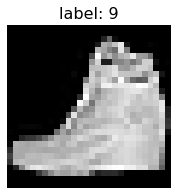

<Figure size 432x288 with 0 Axes>

In [174]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 5000):
    I = x_train[n].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

In [0]:
# define a function to show the loss and accuray rate in the futher model training steps
def plot_result(loss_train_list, acc_train_list, 
                loss_val_list, acc_val_list,
                loss_test_list, acc_test_list):
    """
    input:
    loss_train_list: loss of train dataset
    acc_train_list: accuracy of train dataset 
    loss_val_list: loss of validation dataset
    acc_val_list: accuracy of validation dataset
    loss_test_list: loss of test dataset 
    acc_test_list: accuracy of test dataset
    output:
    'loss v.s. epoch'- plot shows the relationship between epoch and loss of train, test and validation dataset
    'accuracy v.s. epoch'- plot shows the relationship between epoch and accuracy of train, test and validation dataset
    """    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].set_title('loss v.s. epoch',fontsize=16)
    ax[0].plot(loss_train_list, '-b', label='training loss')
    ax[0].plot(loss_val_list, '-g', label='validation loss')
    ax[0].plot(loss_test_list, '-r', label='testing loss')
    ax[0].set_xlabel('epoch',fontsize=16)
    ax[0].legend(fontsize=16)
    ax[0].grid(True)
    ax[1].set_title('accuracy v.s. epoch',fontsize=16)
    ax[1].plot(acc_train_list, '-b', label='training accuracy')
    ax[1].plot(acc_val_list, '-g', label='validation accuracy')
    ax[1].plot(acc_test_list, '-r', label='testing accuracy')
    ax[1].set_xlabel('epoch',fontsize=16)
    ax[1].legend(fontsize=16)
    ax[1].grid(True)
    return fig, ax

### train the neural network model over many epochs

In [0]:
#run this whenever creating a new model
loss_train_list=[]
acc_train_list=[]
loss_val_list=[]
acc_val_list=[]
loss_test_list=[]
acc_test_list=[]
epoch_save=-1

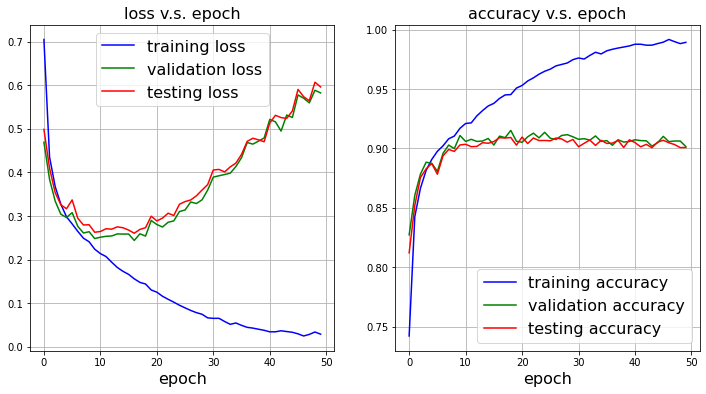

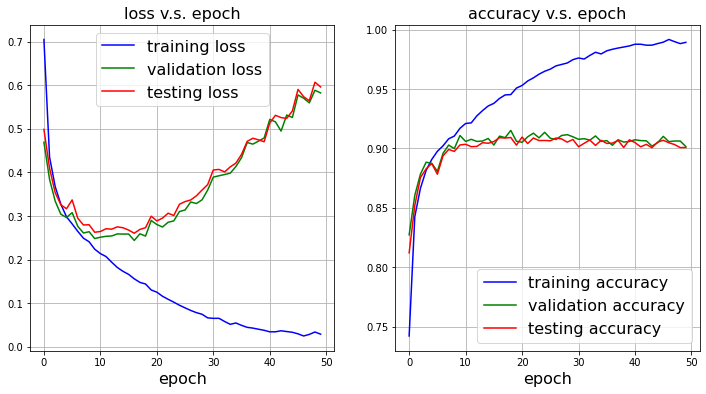

In [177]:
# for each epoch from 1 to 50, we train the model and save the loss and accuracy of models
# the plot makes the changes and relationship more obvious
for epoch in range(epoch_save+1, 50):
    #-------- training and validation--------------------------------
    print('epoch', epoch)
    history=model.fit(x_train, y_train, batch_size=128, epochs=1, validation_data=(x_val, y_val))    
    loss_train=history.history['loss'][0]
    acc_train=history.history['accuracy'][0]        
    loss_val=history.history['val_loss'][0]
    acc_val=history.history['val_accuracy'][0]     
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    loss_val_list.append(loss_val)
    acc_val_list.append(acc_val)    
    print('epoch', epoch, 'training loss:', loss_train, 'acc:', acc_train)
    print('epoch', epoch, 'validation loss:', loss_val, 'acc:', acc_val)
    #-------- testing --------------------------------
    score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
    loss_test=score[0]
    acc_test=score[1]
    loss_test_list.append(loss_test)
    acc_test_list.append(acc_test)
    print('epoch', epoch, 'testing loss:', loss_test, 'acc:', acc_test)    
    #--------save model-------------------------
    model.save('LeNet5_Keras_epoch'+str(epoch)+'.h5')    
    epoch_save=epoch
    #------- show result ----------------------
    display.clear_output(wait=False)
    plt.close('all')
    fig, ax = plot_result(loss_train_list, acc_train_list, 
                          loss_val_list, acc_val_list,
                          loss_test_list, acc_test_list)
    display.display(fig)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f256f65a9e8>,
       dtype=object))

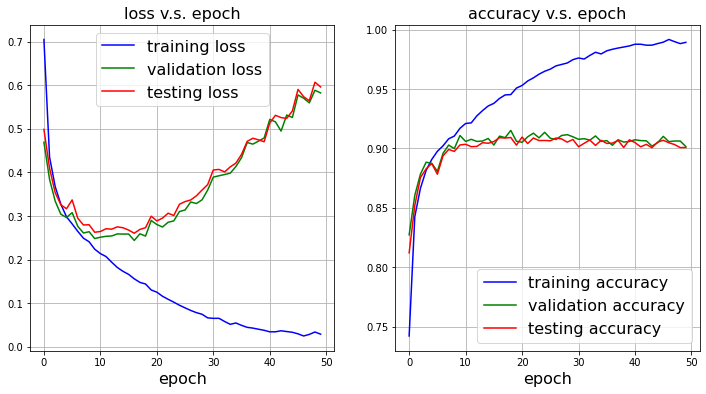

In [178]:
plot_result(loss_train_list, acc_train_list, 
            loss_val_list, acc_val_list,
            loss_test_list, acc_test_list)

### load the best model
The best model is when the test set with highest accuracy rate, the best_id refers to the epoch of model

In [179]:
best_id= np.array(acc_val_list).argmax()
best_id

18

In [0]:
from keras.models import load_model
model = load_model('LeNet5_Keras_epoch'+str(best_id)+'.h5')

### Evaluate the best model

#### Answer: Convolutional Neural Network with an accuracy rate around 0.9092142581939697

In [181]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2731162905693054
Test accuracy: 0.9092142581939697


In [0]:
y_test_pred=model.predict(x_test, batch_size=64)

In [183]:
y_test_pred[0]

array([5.9513908e-11, 2.3890292e-13, 2.3741774e-11, 8.0071771e-10,
       1.3551194e-09, 1.2910131e-06, 1.5991788e-11, 2.7699331e-03,
       7.4033951e-10, 9.9722880e-01], dtype=float32)

In [184]:
rounded_predictions = np.argmax(y_test_pred, axis=1)
print(rounded_predictions[0:10])

[9 5 6 6 2 2 4 7 6 6]


In [185]:
y_test[0]

9

### Create the confusion matrix

#### Answer: 

Actual label 6: label 6 — Shirt is easier to be classified as label 0 — T-shirt/top. 

CNN model performs relatively not well on classifying shirt.

In [186]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rounded_predictions)
cm

array([[1224,    0,   33,   20,    1,    1,  104,    0,    8,    0],
       [   3, 1392,    4,   13,    3,    0,    6,    0,    3,    0],
       [   8,    1, 1194,    9,   60,    0,   91,    0,    3,    0],
       [  35,    8,   24, 1305,   45,    1,   35,    0,    2,    0],
       [   3,    0,   76,   27, 1188,    0,   87,    0,    6,    1],
       [   0,    0,    0,    0,    0, 1356,    0,   30,    2,    9],
       [ 156,    1,  101,   28,   78,    0, 1099,    0,   10,    0],
       [   0,    0,    0,    0,    0,    9,    0, 1313,    0,   32],
       [   6,    0,    5,    1,    3,    4,    6,    3, 1312,    1],
       [   0,    0,    1,    0,    0,    4,    0,   59,    1, 1346]])

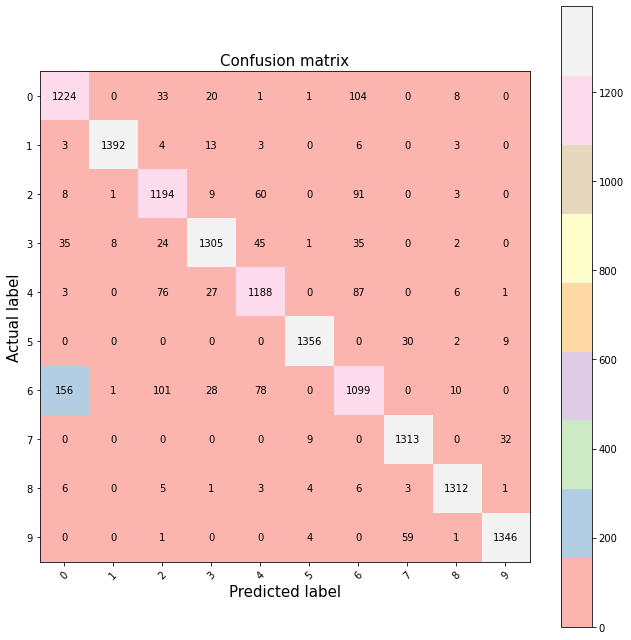

In [187]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):    
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')